In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
fpaths = "./testes_seq_paral/test_greff/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
speedups = []

In [27]:
sequenciais = []

for i in sizes:
    print(i)
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        for linha in arquivo:
            if "Tempo sequencial" in linha:
                aux = linha.split(":")
                aux = aux[1].split("sec")
                aux = aux[0]
                print(float(aux))
                sequencial_local.append(float(aux))
    sequenciais.append(np.mean(sequencial_local))

small
210.497367
211.622063
212.056015
211.840203
214.817286
medium
572.136067
561.959976
562.519972
571.388434
566.404
large
1182.99673
1180.867513
1174.972892
1183.120962
1173.222437


In [67]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo paralelo" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_pthread.append(np.mean(paralelo_local))

pthreads - small threads 2
112.137441
111.427646
114.471876
111.370977
113.24076
5
pthreads - small threads 4
62.606873
63.129203
63.854129
63.128411
65.61957
5
pthreads - small threads 8
65.767898
65.840781
65.793958
65.908372
65.961794
5
pthreads - small threads 16
62.579743
63.875418
62.839918
63.219345
62.928481
5
pthreads - medium threads 2
299.039958
297.152644
303.239855
302.740071
301.612539
5
pthreads - medium threads 4
170.453559
170.706048
172.756104
170.708769
169.638258
5
pthreads - medium threads 8
174.957794
174.966792
174.639231
174.976335
174.756459
5
pthreads - medium threads 16
169.06278
169.455429
170.10139
169.646358
168.827229
5
pthreads - large threads 2
624.630841
626.356185
626.177477
629.70768
631.670919
5
pthreads - large threads 4
351.469608
356.8564
356.627534
355.315882
360.085401
5
pthreads - large threads 8
365.703178
364.601909
364.86972
365.59842
364.952601
5
pthreads - large threads 16
356.186827
355.316236
355.008901
354.275821
354.624791
5


In [68]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo mpi" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_mpi.append(np.mean(paralelo_local))

mpi - small threads 2
113.130706
114.405845
114.290588
112.540477
114.615276
5
mpi - small threads 4
62.053992
64.583127
63.543371
63.862922
65.996948
5
mpi - small threads 8
65.886232
64.775709
64.406316
65.015044
64.266338
5
mpi - small threads 16
66.704265
66.689643
66.239183
66.26668
66.191539
5
mpi - medium threads 2
302.454672
299.002868
299.426931
298.898551
298.682962
5
mpi - medium threads 4
170.22783
168.326981
172.379322
170.046022
169.161689
5
mpi - medium threads 8
172.834537
172.749773
172.95016
171.020611
171.763601
5
mpi - medium threads 16
176.051859
175.812745
176.969198
177.16186
176.213758
5
mpi - large threads 2
636.561659
638.098516
634.77567
626.190127
632.235877
5
mpi - large threads 4
354.866566
359.642525
357.560707
356.662726
353.588716
5
mpi - large threads 8
362.358338
358.218544
358.975805
361.548614
359.572055
5
mpi - large threads 16
151.336259
1


In [69]:
sequenciais

[212.1665868, 566.8816898, 1179.0361067999997]

In [70]:
paralelos_pthread

[112.52973999999999,
 63.6676372,
 65.8545606,
 63.088581,
 300.7570134,
 170.85254760000004,
 174.8593222,
 169.41863719999998,
 627.7086204,
 356.070965,
 365.1451656,
 355.0825152]

In [80]:
paralelos_mpi

[113.7965784,
 64.008072,
 64.8699278,
 66.418262,
 299.6931968,
 170.0283688,
 172.26373640000003,
 176.44188400000002,
 633.5723697999999,
 356.464248,
 360.13467120000007,
 151.336259]

In [72]:
speedups_pthreads = []

speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(0,4)] 
speedups_pthreads.append(speedup_local)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(4,8)] 
speedups_pthreads.append(speedup_local)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(8,12)]
speedups_pthreads.append(speedup_local)

In [81]:
speedups_mpi = []

speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(0,4)] 
speedups_mpi.append(speedup_local)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(4,8)] 
speedups_mpi.append(speedup_local)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(8,12)]
speedups_mpi.append(speedup_local)

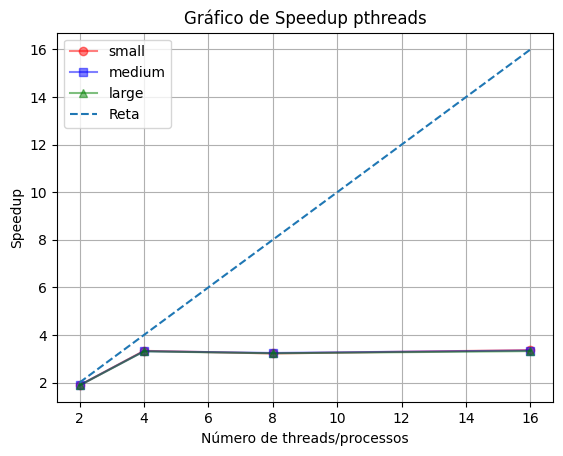

In [82]:
plt.plot(threads, speedups_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
speedups_mpi[2]

[1.8609335933828468, 3.307585861457836, 3.2738755834625666, 7.790836872741777]

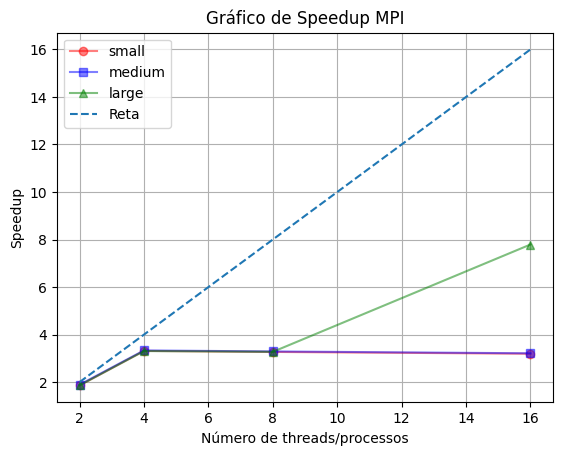

In [85]:
plt.plot(threads, speedups_mpi[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_mpi[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_mpi[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI')
plt.grid(True)
plt.legend()
plt.show()